<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prophet</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#NeuralNetRegressor" data-toc-modified-id="NeuralNetRegressor-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>NeuralNetRegressor</a></span><ul class="toc-item"><li><span><a href="#net_1-dropout" data-toc-modified-id="net_1-dropout-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>net_1 dropout</a></span></li><li><span><a href="#net_2-dropout" data-toc-modified-id="net_2-dropout-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>net_2 dropout</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><strong>Общий вывод</strong></a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

<div style="border:solid Chocolate 2px; padding: 40px">

## Описание проекта

Нам необходимо разработать нейронную сеть для обсерватории. Нейросеть должна помочь предсказывать абсолютную температуру на поверхности звезды. Обучить модель можно на данных базы обсерватории, где есть характеристики уже изученных 240 звёзд.

<b>Описание данны</b>

Характеристики звёзд содержат следующие данные:
* Относительная светимость L/Lo — светимость звезды относительно Солнца.
* Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца.
* Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды.
* Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа.
* Тип звезды.
* Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах.
    
Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

# Вариант 2

In [1]:
# !pip install tsfresh

In [2]:
# !pip install Prophet

In [3]:
import pandas as pd
import numpy as np
from numpy.random import RandomState

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error

from catboost import Pool, CatBoostRegressor

import matplotlib.pyplot as plt
import seaborn as sns

# import torch
# import torch.nn as nn
# import torchvision
# import torch.optim as optim

# from skorch import NeuralNetRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

# import shap

import warnings

import time

RANDOM_STATE = 42

C:\Users\Katya\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.graphics import tsaplots

from statsmodels.tools.eval_measures import rmse

In [5]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [6]:
from tsfresh import extract_features
from tsfresh.feature_extraction import settings
from tsfresh.utilities.dataframe_functions import impute

In [12]:
# %pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
path = 'C:/Users/Katya/Desktop/ds_learning/21sprint_временные ряды/project/'

In [17]:
data = pd.read_csv(path + 'taxi.csv', index_col=[0], parse_dates=[0])

In [18]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


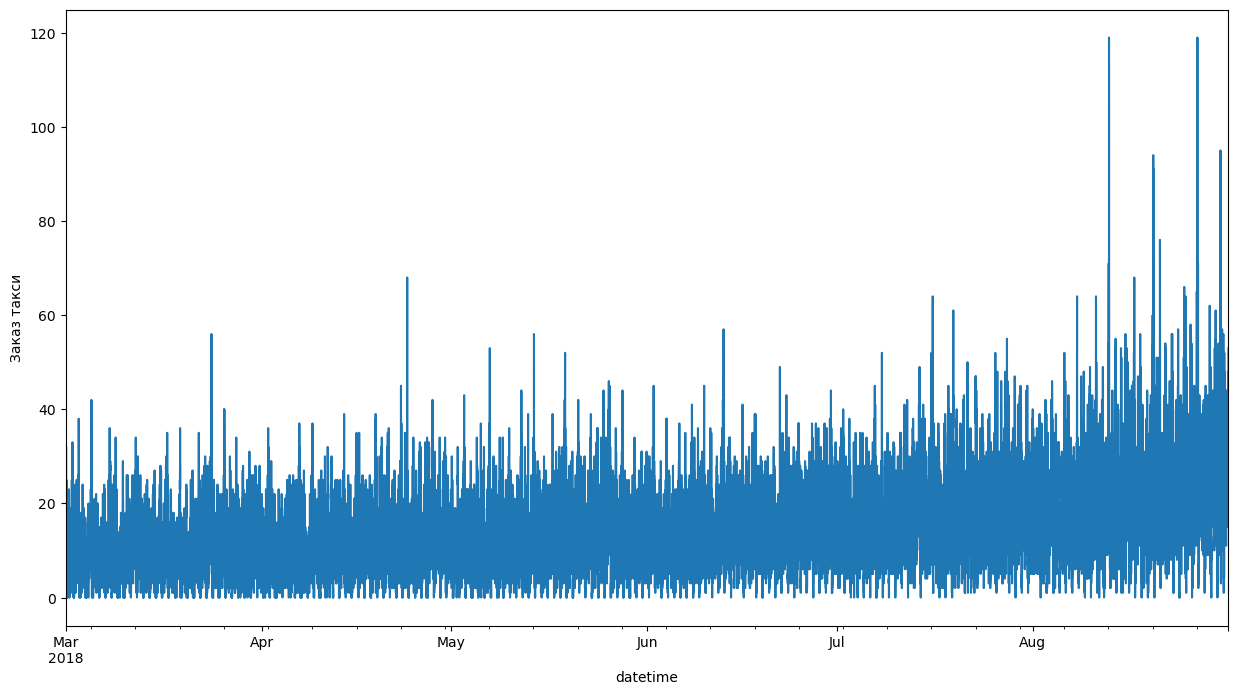

In [19]:
plt.figure(figsize=(15,8))
data['num_orders'].plot()
plt.ylabel('Заказ такси')
pylab.show()

<Figure size 1500x800 with 0 Axes>

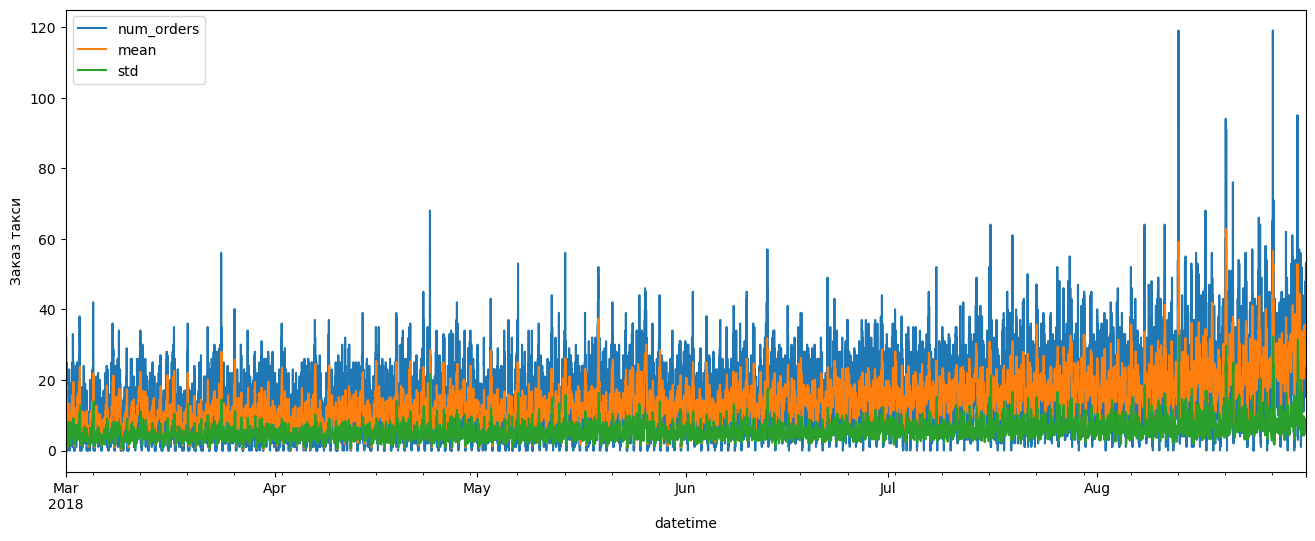

In [23]:
plt.figure(figsize=(15,8))
data['mean'] = data['num_orders'].rolling(12).mean()
data['std'] = data['num_orders'].rolling(12).std()
data.plot(figsize=(16, 6)) 
plt.ylabel('Заказ такси')
pylab.show()

In [29]:
# sm.tsa.seasonal_decompose(data['num_orders']).plot()
# plt.show()

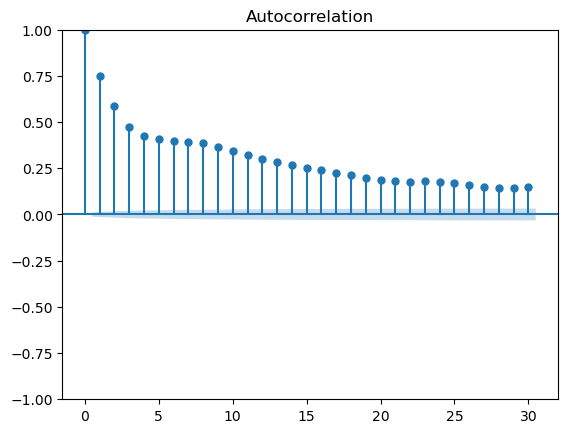

In [30]:
fig = tsaplots.plot_acf(data['num_orders'], lags=30)
plt.show() 

In [31]:
def adf(series, alpha=0.05):
  p_value = ts.adfuller(series)[1]
  print(f"p-value = {p_value}")
  if p_value > alpha:
    print('Недостаточно оснований отвергнуть нулевую гипотезу о нестационарности ряда')
  else:
    print('Ряд стационарный')

In [32]:
adf(data['num_orders'])

p-value = 2.2286378815477063e-23
Ряд стационарный


In [33]:
fig = tsaplots.plot_acf(data_diff, lags=30)
plt.show() 

NameError: name 'data_diff' is not defined

## Prophet

In [9]:
# data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data = pd.read_csv(path + 'taxi.csv', index_col=[0], parse_dates=[0])

In [10]:
data = data.resample('1H').sum()

C:\Users\Katya\AppData\Local\Temp\ipykernel_29676\2814516379.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('1H').sum()


In [11]:
# data_pr = pd.read_csv('/datasets/taxi.csv', parse_dates=[0])
data_pr = data.copy(deep=True)
data_pr.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [12]:
data_pr['date'] = data_pr.index

In [13]:
data_pr.reset_index(drop=True, inplace=True)

In [14]:
data_pr.head()

,num_orders,date
0,124,2018-03-01 00:00:00
1,85,2018-03-01 01:00:00
2,71,2018-03-01 02:00:00
3,66,2018-03-01 03:00:00
4,43,2018-03-01 04:00:00


In [15]:
data_pr.columns = ['y','ds']
data_pr.head()

,y,ds
0,124,2018-03-01 00:00:00
1,85,2018-03-01 01:00:00
2,71,2018-03-01 02:00:00
3,66,2018-03-01 03:00:00
4,43,2018-03-01 04:00:00


In [16]:
data_pr = data_pr[['ds', 'y']]

In [19]:
# print(data_pr.iloc[:-2]) # All records except last two 
# print(data_pr.iloc[-2]) # 2nd from last record 
# print(data_pr.iloc[-2:]) # Last two records   

In [20]:
TEST_SIZE = int(0.1 * data_pr.shape[0])

train_data = data_pr.iloc[:-TEST_SIZE] 
test_data = data_pr.iloc[-TEST_SIZE:] 

In [21]:
train_data.shape[0]

3975

In [22]:
test_data.shape[0]

441

In [23]:
test_data.head(), test_data.index

(                      ds    y
 3975 2018-08-13 15:00:00  175
 3976 2018-08-13 16:00:00  144
 3977 2018-08-13 17:00:00  152
 3978 2018-08-13 18:00:00  104
 3979 2018-08-13 19:00:00   91,
 RangeIndex(start=3975, stop=4416, step=1))

In [24]:
test_data.tail()

,ds,y
4411,2018-08-31 19:00:00,136
4412,2018-08-31 20:00:00,154
4413,2018-08-31 21:00:00,159
4414,2018-08-31 22:00:00,223
4415,2018-08-31 23:00:00,205


In [25]:
m = Prophet()
m.fit(train_data)

16:08:52 - cmdstanpy - INFO - Chain [1] start processing
16:08:53 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = m.make_future_dataframe(periods=TEST_SIZE, freq='H')
future

C:\ProgramData\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
0,2018-03-01 00:00:00
1,2018-03-01 01:00:00
2,2018-03-01 02:00:00
3,2018-03-01 03:00:00
4,2018-03-01 04:00:00
...,...
4411,2018-08-31 19:00:00
4412,2018-08-31 20:00:00
4413,2018-08-31 21:00:00
4414,2018-08-31 22:00:00


In [27]:
forecast = m.predict(future)

In [28]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4411,2018-08-31 19:00:00,125.521749,92.666366,158.210554,124.985141,126.005654,0.005883,0.005883,0.005883,-11.902643,-11.902643,-11.902643,11.908526,11.908526,11.908526,0.0,0.0,0.0,125.527632
4412,2018-08-31 20:00:00,125.545320,101.897473,164.711239,125.007271,126.030262,7.094548,7.094548,7.094548,-4.788584,-4.788584,-4.788584,11.883132,11.883132,11.883132,0.0,0.0,0.0,132.639868
4413,2018-08-31 21:00:00,125.568892,114.980154,175.887629,125.029392,126.054886,21.964322,21.964322,21.964322,10.214496,10.214496,10.214496,11.749826,11.749826,11.749826,0.0,0.0,0.0,147.533213
4414,2018-08-31 22:00:00,125.592463,128.121307,191.870091,125.051503,126.079523,34.925527,34.925527,34.925527,23.416812,23.416812,23.416812,11.508715,11.508715,11.508715,0.0,0.0,0.0,160.517990
4415,2018-08-31 23:00:00,125.616034,136.714755,199.133802,125.073614,126.104133,41.170922,41.170922,41.170922,30.009711,30.009711,30.009711,11.161211,11.161211,11.161211,0.0,0.0,0.0,166.786956


C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


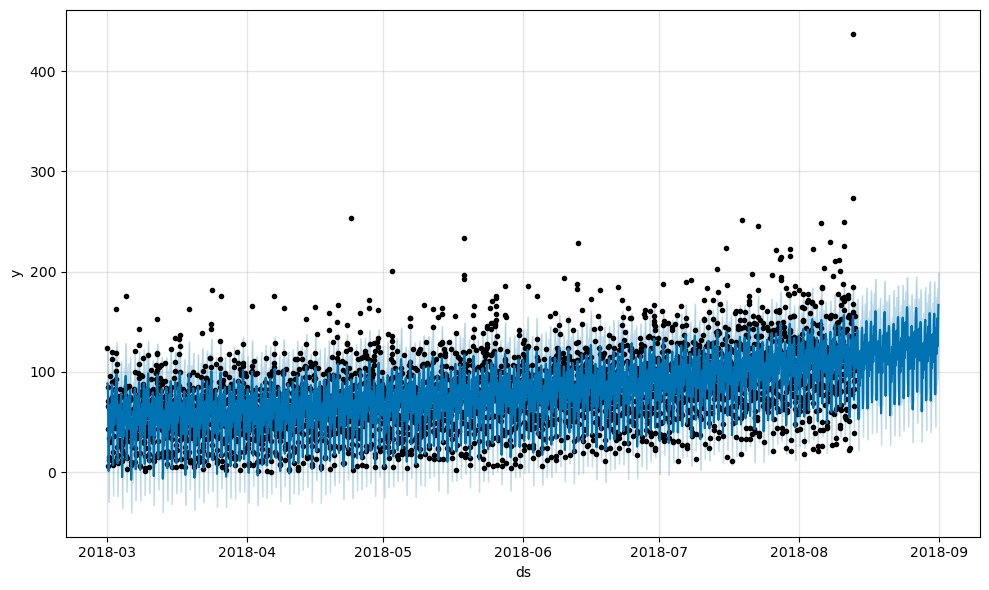

In [29]:
# m.plot(forecast.to_numpy(), figsize=(16, 6))
m.plot(
    forecast,
    ax=None,
    uncertainty=True,
    plot_cap=True,
    xlabel='ds',
    ylabel='y',
    figsize=(10, 6),
    include_legend=False,
)
plt.show()

In [30]:
prophet_pred = pd.DataFrame({"Date":forecast['ds'], 
                             "Pred":forecast["yhat"]})

prophet_pred = prophet_pred.set_index("Date")
prophet_pred[-TEST_SIZE:].tail()

,Pred
Date,
2018-08-31 19:00:00,125.527632
2018-08-31 20:00:00,132.639868
2018-08-31 21:00:00,147.533213
2018-08-31 22:00:00,160.517990
2018-08-31 23:00:00,166.786956


In [31]:
test_data = test_data.set_index(['ds'])

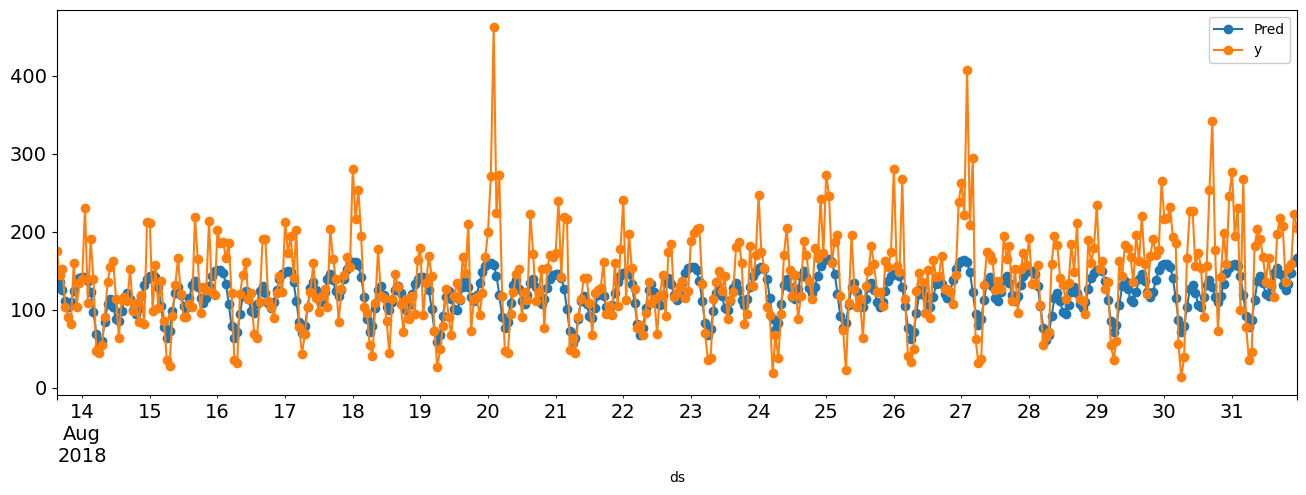

In [32]:
plt.figure(figsize=(16,5))

prophet_pred[-TEST_SIZE:]['Pred'].plot(fontsize=14, style='-o')
# test_data = test_data.set_index(['ds'])
test_data['y'].plot(fontsize=14, style='-o')
plt.legend(loc = 'best', framealpha = 1)
plt.show()

In [33]:
prophet_rmse_error_train = rmse(test_data['y'], prophet_pred[-TEST_SIZE:]['Pred'])
prophet_mse_error_train = prophet_rmse_error_train**2
mean_value_train = test_data['y'].mean()

prophet_rmse_error_test = rmse(train_data['y'], prophet_pred[:-TEST_SIZE]['Pred'])
prophet_mse_error_test = prophet_rmse_error_test**2
mean_value_test = train_data['y'].mean()

print("Train")
print(f'MSE Error: {prophet_mse_error_train}\nRMSE Error: {prophet_rmse_error_train}\nMean: {mean_value_train}')

print("Test")
print(f'MSE Error: {prophet_mse_error_test}\nRMSE Error: {prophet_rmse_error_test}\nMean: {mean_value_test}')

Train
MSE Error: 2334.7576748063693
RMSE Error: 48.31933023962945
Mean: 139.64172335600907
Test
MSE Error: 604.4560071756986
RMSE Error: 24.585687038919588
Mean: 78.2966037735849


In [1]:
# !pip install torch==1.10.0+cpu torchvision==0.11.0+cpu torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html --user

In [2]:
# pip install -U skorch

In [3]:
# pip install torchvision

In [4]:
# !pip install shap

In [7]:
import pandas as pd
import numpy as np
from numpy.random import RandomState

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error

from catboost import Pool, CatBoostRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torchvision
import torch.optim as optim

from skorch import NeuralNetRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

import shap

import warnings

import time

RANDOM_STATE = 42

warnings.filterwarnings("ignore")

In [8]:
path = 'C:/Users/Katya/Desktop/ds_learning/21sprint_временные ряды/project/'

In [9]:
data = pd.read_csv(path + 'taxi.csv', index_col=[0], parse_dates=[0])

In [10]:
data.sort_index(inplace=True)

In [11]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [12]:
data = data.resample('1H').sum()

In [13]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## Анализ

Необходимо проверить, в хронологическом ли порядке расположены даты и время.

In [14]:
print(data.index.is_monotonic)

AttributeError: 'DatetimeIndex' object has no attribute 'is_monotonic'

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [53]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


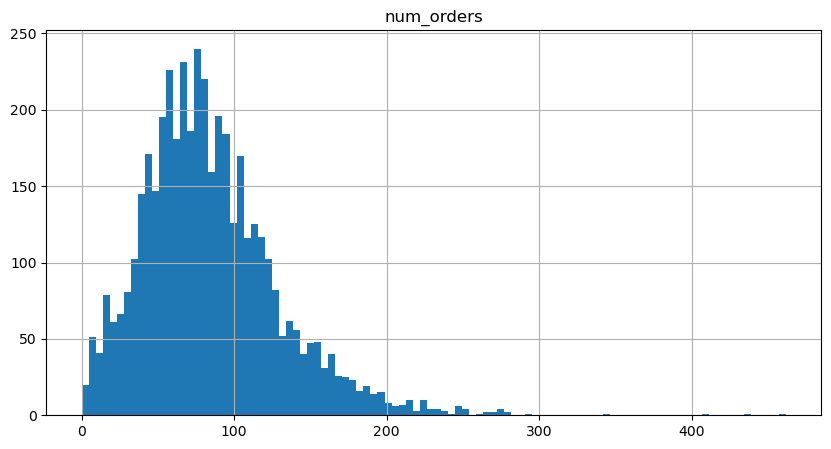

In [54]:
data.hist(bins=100, figsize=(10, 5));

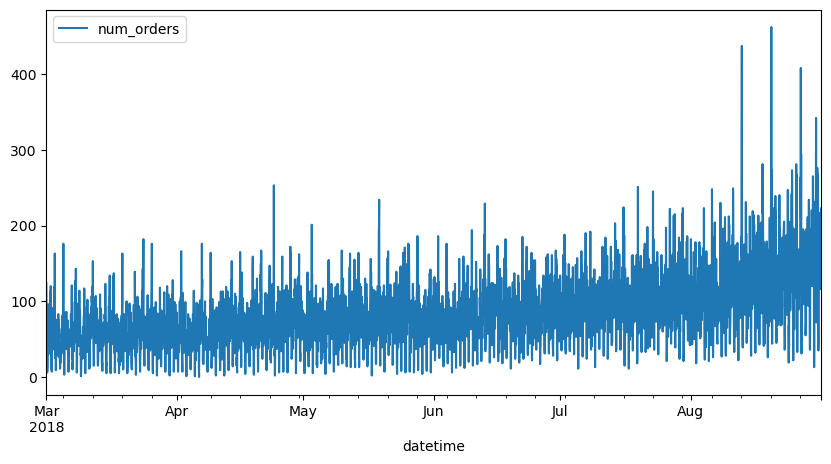

In [55]:
data.plot(figsize=(10, 5));

In [56]:
print(data.index.min(), data.index.max())

2018-03-01 00:00:00 2018-08-31 23:00:00


In [57]:
decomposed = seasonal_decompose(data)

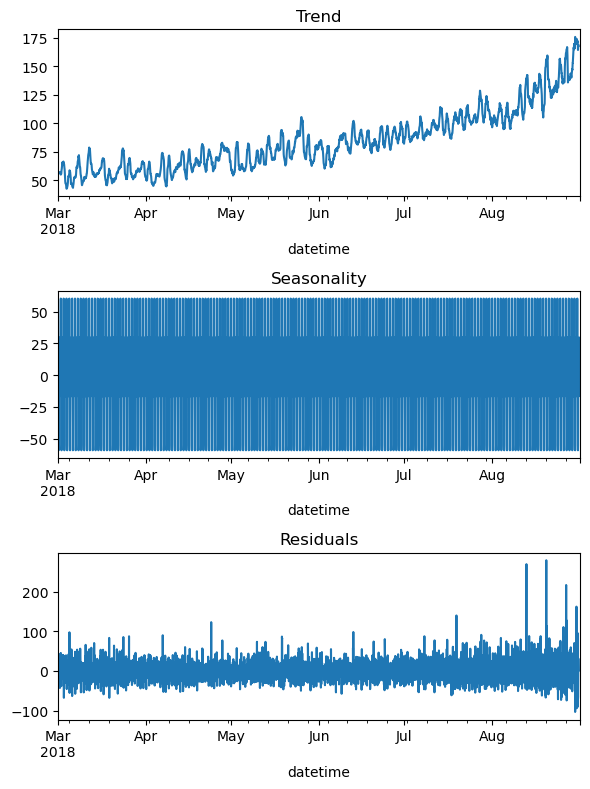

In [58]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

In [59]:
decomposed.seasonal['2018-03-01':'2018-04-01']

datetime
2018-03-01 00:00:00    60.248112
2018-03-01 01:00:00    20.177074
2018-03-01 02:00:00    28.982743
2018-03-01 03:00:00    17.885407
2018-03-01 04:00:00     2.791145
                         ...    
2018-04-01 19:00:00    -7.124270
2018-04-01 20:00:00    -2.696560
2018-04-01 21:00:00    10.670243
2018-04-01 22:00:00    13.596814
2018-04-01 23:00:00    25.000503
Freq: h, Name: seasonal, Length: 768, dtype: float64

Text(0.5, 1.0, 'Seasonality')

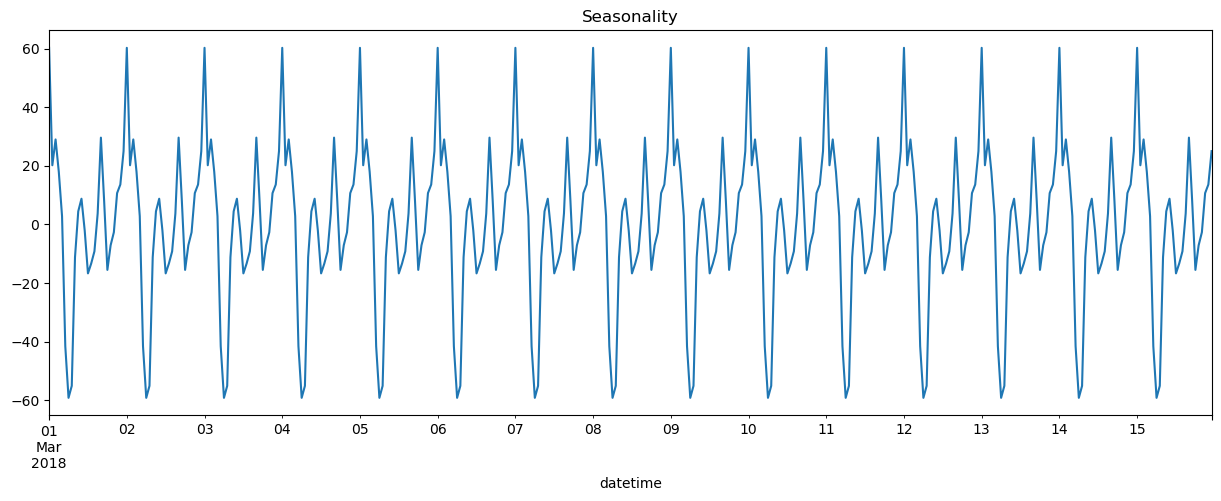

In [60]:
plt.figure(figsize=(15, 5))
decomposed.seasonal['2018-03-01':'2018-03-15'].plot(ax=plt.gca())
plt.title('Seasonality')

Text(0.5, 1.0, 'Seasonality')

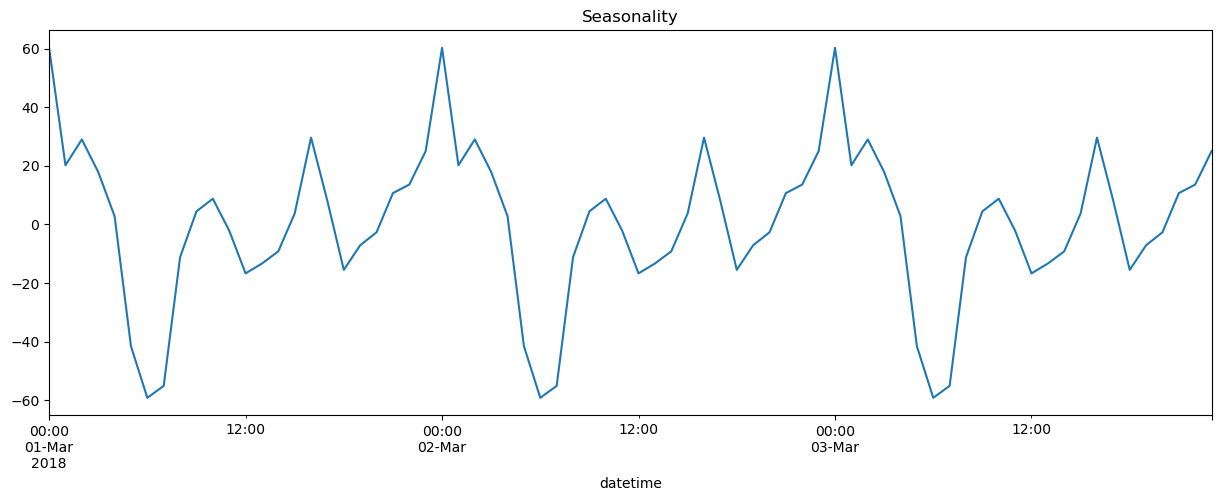

In [61]:
plt.figure(figsize=(15, 5))
decomposed.seasonal['2018-03-01':'2018-03-03'].plot(ax=plt.gca())
plt.title('Seasonality')

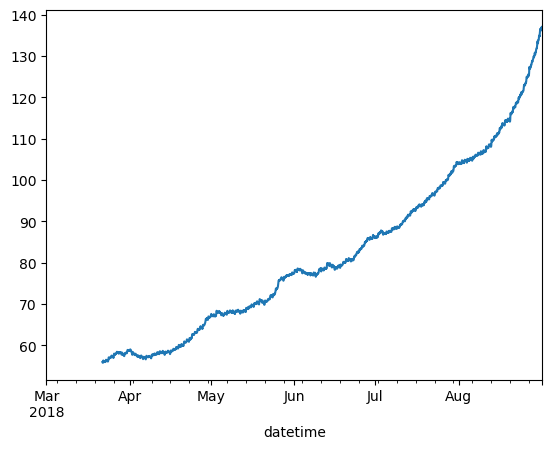

In [62]:
dt = data.copy()
dt['rolling_mean'] = dt.rolling(500).mean()
dt['rolling_mean'].plot();

In [63]:
dt.head()

,num_orders,rolling_mean
datetime,,
2018-03-01 00:00:00,124,NaN
2018-03-01 01:00:00,85,NaN
2018-03-01 02:00:00,71,NaN
2018-03-01 03:00:00,66,NaN
2018-03-01 04:00:00,43,NaN


**Вывод**

Файл содержит данные о количестве заказов такси с марта по август 2018 года. Данные распределены нормально.
Мы ресеплировали данные выбрав новую длину интервала в 1 час, количество заказов соответсвенно суммировали.
Можно заметить тренд по увеличению количества заказов летом. Также хорошо видны "сезонные" колебания в течении суток.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Декомпозиция сделана верно. Можно еще  визуализировать сезонность на более коротком интервале

<div class="alert alert-info">
Сделала
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Подготовка данных

Напишем функцию для создания признаков. Добавим такие признаки как месяц, день и день недели. Для прогнозирования роста или уменьшения заказов добавим "отстающие значения". Также определим скользящее среднее, чтобы выявить общий тренд временного ряда.
Определим наибольшее количество отставаний и размер окна для скользящего среднего при помощи простой линейной регрессии.

In [64]:
def make_features(data, max_lag, rolling_mean_size):
    df = data.copy()
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    return df

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Отлично, что написана функция, которая возвращает новый датафрейм, а не изменяет глобальную переменную            

In [65]:
# data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
# data.sort_index(inplace=True)
# data = data.resample('1H').sum()

best_score = 100
best_model = None
best_max_lag = 0
best_rolling_mean_size = 0
best_rmse = 0

for max_lag in [1, 2, 5, 10, 20, 40, 80]:
    for rolling_mean_size in [5, 10, 20, 40, 100, 500, 1000, 2000]:
        
        df = make_features(data, max_lag, rolling_mean_size)

        train, test = train_test_split(df, shuffle=False, test_size=0.1)
        train = train.dropna()

        target_train = train['num_orders']
        features_train = train.drop('num_orders', axis=1)

        target_test = test['num_orders']
        features_test = test.drop('num_orders', axis=1)
        
        tscv = TimeSeriesSplit(n_splits=3)
        model = LinearRegression(fit_intercept=False)
        model.fit(features_train, target_train)
        scores = cross_val_score(estimator=model, cv=tscv, X=features_train, y=target_train,
                                 scoring='neg_root_mean_squared_error')
        cv_score = -np.average(scores)
        
        predictions = model.predict(features_test)
        rmse = mean_squared_error(target_test, predictions, squared=False)
        
        #print('max_lag:', max_lag, 'rolling_mean_size', rolling_mean_size, 'cv_score:', cv_score, 'rmse:', rmse)
        
        if cv_score < best_score:
            best_score = cv_score
            best_model = model
            best_rmse = rmse
            best_max_lag = max_lag
            best_rolling_mean_size = rolling_mean_size

print('best_max_lag:', best_max_lag, 'best_rolling_mean_size:', best_rolling_mean_size, 'best_score:', best_score, 'best_rmse:', best_rmse)

data = make_features(data, best_max_lag, best_rolling_mean_size)
data.head()

best_max_lag: 80 best_rolling_mean_size: 10 best_score: 24.516203040826117 best_rmse: 41.784867612497926


,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_72,lag_73,lag_74,lag_75,lag_76,lag_77,lag_78,lag_79,lag_80,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    
знай, что тестирование положено проводить для одной лучшей модели. На этом шаге мы должны были настроить модели и выбрать одну наилучшую, опираясь на метрики данные заказчиком (это может быть качество, время обучения, скорость предсказания и т.д.). Тестированием мы моделируем работу модели на новых незнакомых ей данных, которые ни разу не использовались ни при тренировке, ни при валидации, и проверяем, не словили ли мы переобучение. А эти данные могут быть смещенными, с выбросами и т.д. То есть по таким данным некорректно заново переопределять модель-победитель.  Советую тебе статью, рассматривающую разные способы валидации моделей машинного обучения: https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7 (нужен VPN)
        
Метрики качества на тестовой выборке для всех моделей можно вычислить только с целью исследования их смещения относительно аналогичных метрик на кросс-валидации/ валидационной выборке. Но это не означает, что модель-победитель должна выбираться исходя из сравнения метрик, полученных на тестовой выборке.   

<div class="alert alert-info">
Александр, спасибо за статью! В этом проекте пока останусь на кросс-валидации.

Здесь и ниже исправила подбор моделей по результату на валидации, а не по тесту.

Здесь конкретно хотела подобрать best_max_lag, best_rolling_mean_size. Не придумала как это сделать по-другому, не в цикле. Модель подбирала по cross_val_score. Посчитала RMSE и на тестовой выборке. Сразу видно, что результат на тесте гораздо хуже. По идее это свидетельствует о переобучении. То же происходит и с остальными моделями.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Понял тебя

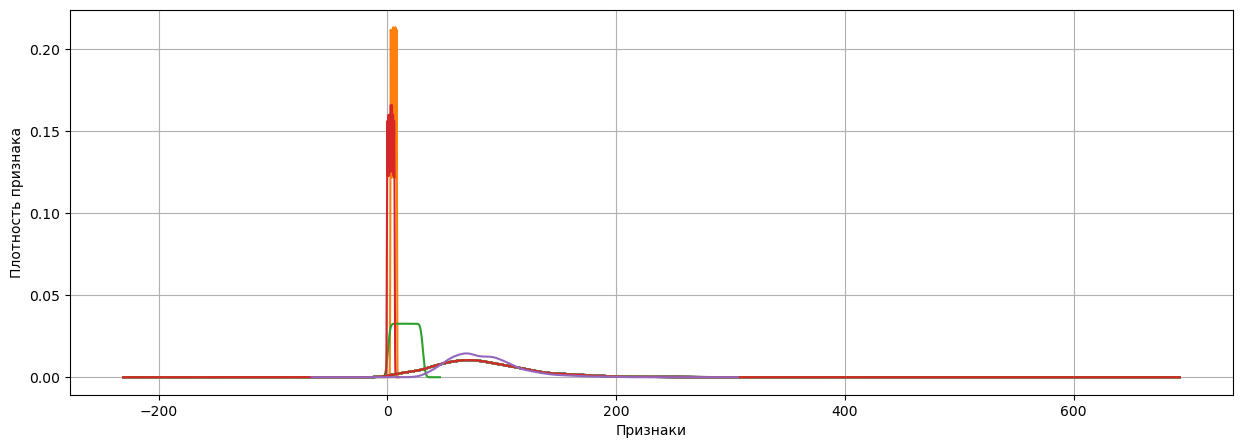

In [66]:
data.plot(kind='density', figsize=(15, 5), grid=True, legend=False)
plt.xlabel('Признаки')
plt.ylabel('Плотность признака');

Данные не требуют масштабирования.

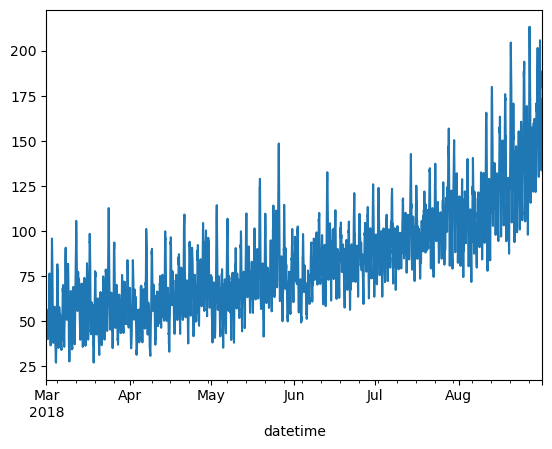

In [67]:
# data['rolling_mean'] = data.rolling(10).mean()
data['rolling_mean'].plot();

In [68]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

In [69]:
target_train = train['num_orders']
features_train = train.drop('num_orders', axis=1)

features_train.shape, target_train.shape

((3894, 84), (3894,))

In [70]:
target_test = test['num_orders']
features_test = test.drop('num_orders', axis=1)

features_test.shape, target_test.shape

((442, 84), (442,))

In [71]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-04 08:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


**Вывод**

Мы написали функцию для создания признаков. Добавили такие признаки как месяц, день и день недели. Для прогнозирования роста или уменьшения заказов добавили "отстающие значения". Определили скользящее среднее, чтобы выявить общий тренд временного ряда.

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Хорошо, что деление происходит последовательно по времени

## Обучение

### LinearRegression

In [72]:
# Оценим качество работы линейной регрессии при помощи кросс-валидации.
# Для этого создадим объект-генератор разбиений для временного ряда при помощи TimeSeriesSplit.
# Число фолдов зададим равным 5.

tscv = TimeSeriesSplit(n_splits=5)

In [73]:
model_LR = LinearRegression()

In [74]:
model_params = {"fit_intercept": [True, False],
                "copy_X": [True, False]}

gs_LR = GridSearchCV(model_LR, model_params, cv=tscv, scoring='neg_root_mean_squared_error')

In [75]:
%%time
start_time = time.time()  # время начала выполнения

gs_LR.fit(features_train, target_train)

end_time = time.time()  # время окончания выполнения
execution_time_LR = end_time - start_time  # вычисляем время выполнения
print(f"Время выполнения программы: {execution_time_LR} секунд")

Время выполнения программы: 0.24305415153503418 секунд
CPU times: total: 1.89 s
Wall time: 243 ms


In [76]:
gs_LR.best_params_

{'copy_X': True, 'fit_intercept': False}

In [77]:
LR_best_score = -gs_LR.best_score_
LR_best_score

24.25190059697514

In [78]:
predictions_LR = gs_LR.best_estimator_.predict(features_test)
rmse_LR = mean_squared_error(target_test, predictions_LR, squared=False)
rmse_LR

41.784867612497926

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
При работе с временными рядами не следует использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа нужно передать в параметр cv в метод основанный на кросс-валидации
    
(это касается абсолютно всех моделей, всех cross_val_score и всех SearchCV)
</div>

<div class="alert alert-info">
Поправила
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

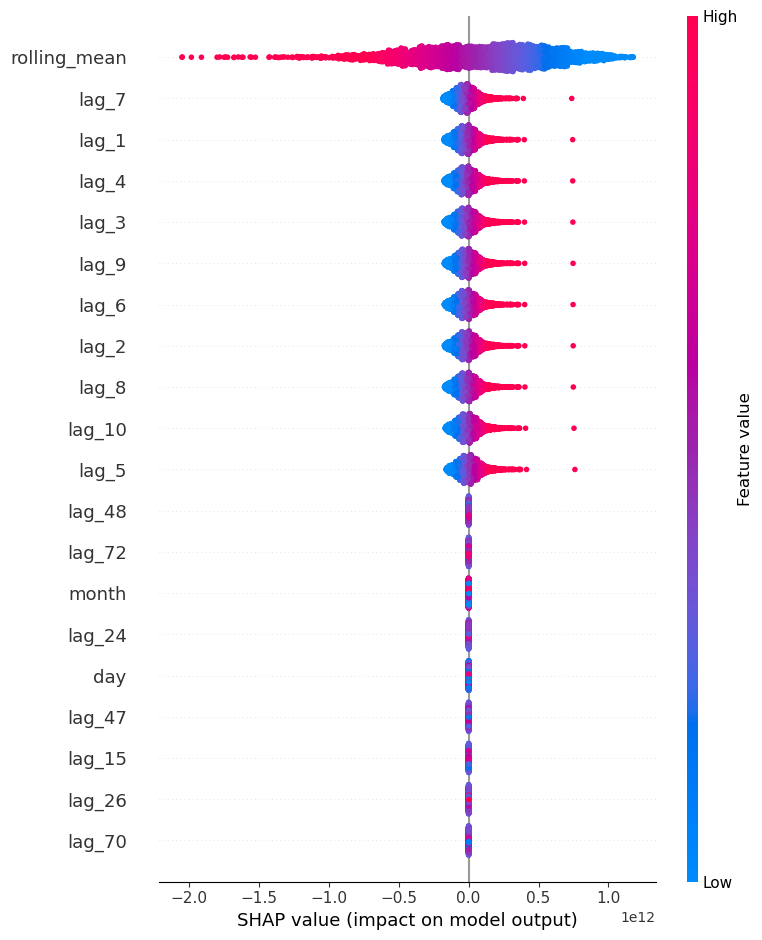

In [79]:
explainer = shap.Explainer(gs_LR.best_estimator_, features_train)
shap_values = explainer.shap_values(features_train)

shap.summary_plot(shap_values, features_train, feature_names=features_train.columns)

### RandomForestRegressor

In [80]:
tscv = TimeSeriesSplit(n_splits=5)

In [81]:
model_forest = RandomForestRegressor()

model_params = {'n_estimators': range (1, 6, 2),
                'max_depth': range (1, 13, 2),
                'min_samples_leaf': range (1,8)}

grid_forest = GridSearchCV(model_forest, model_params, cv=tscv, scoring='neg_root_mean_squared_error')

In [82]:
%%time
start_time = time.time()  # время начала выполнения

grid_forest.fit(features_train, target_train)

end_time = time.time()  # время окончания выполнения
execution_time_RF = end_time - start_time  # вычисляем время выполнения
print(f"Время выполнения программы: {execution_time_RF} секунд")

Время выполнения программы: 57.108681201934814 секунд
CPU times: total: 57.1 s
Wall time: 57.1 s


In [83]:
grid_forest.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 5}

In [84]:
RF_best_score = -grid_forest.best_score_
RF_best_score

25.679616110171303

In [85]:
predictions_forest = grid_forest.best_estimator_.predict(features_test)

In [86]:
rmse_forest = mean_squared_error(target_test, predictions_forest, squared=False)
rmse_forest

42.29903536846109

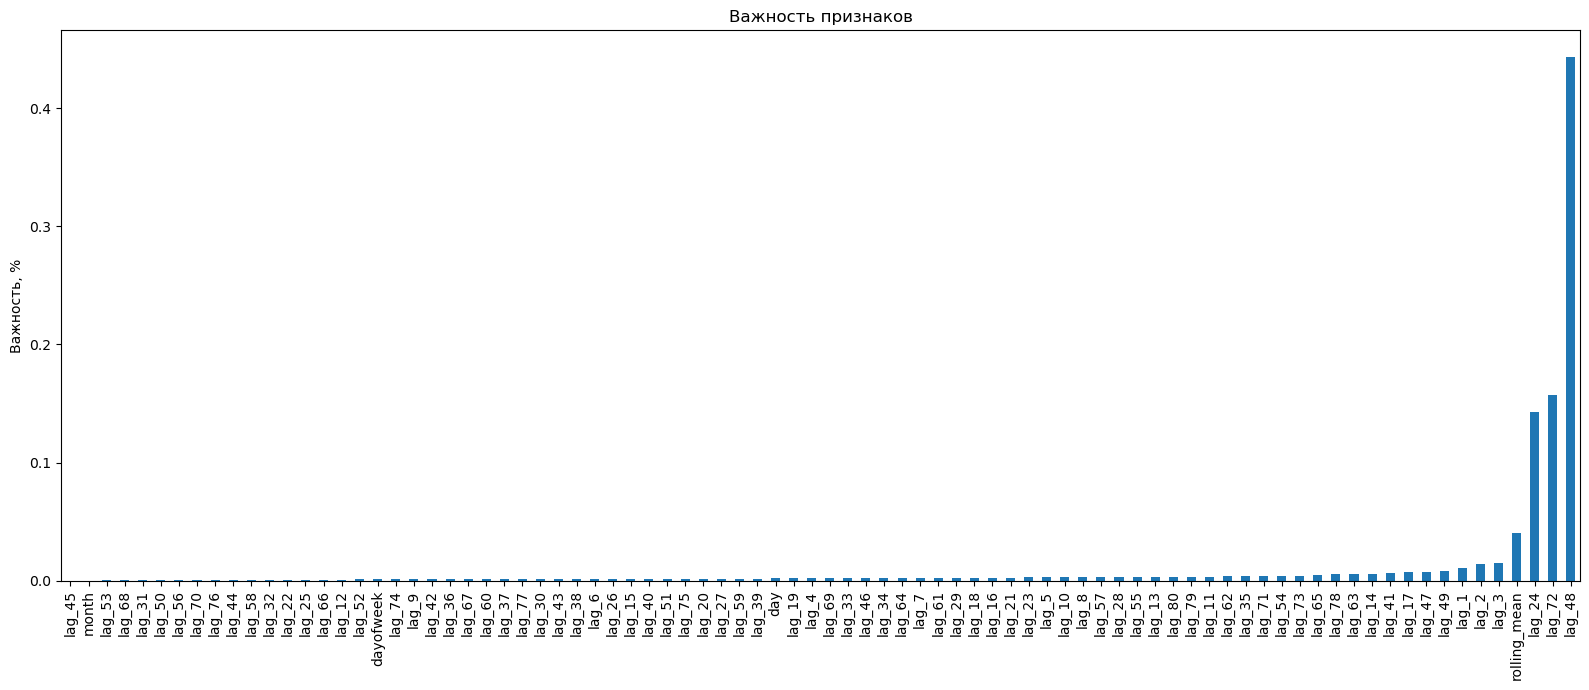

In [87]:
importances = pd.Series(grid_forest.best_estimator_.feature_importances_,
                         features_train.columns).sort_values()
fig, ax = plt.subplots(figsize=(16,7))
importances.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

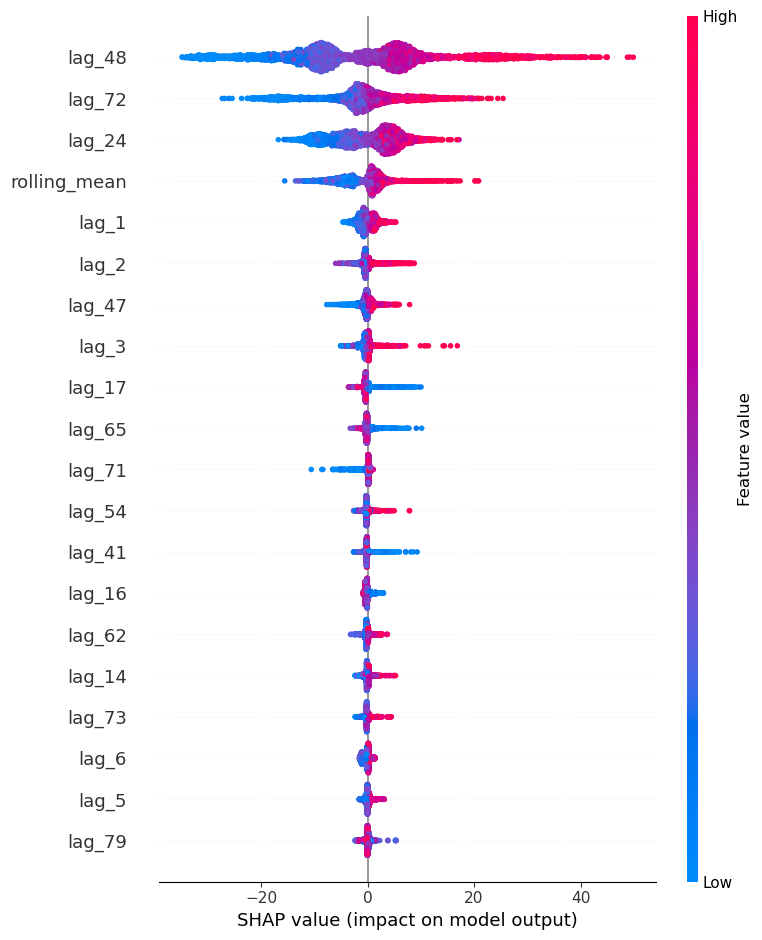

In [88]:
explainer = shap.Explainer(grid_forest.best_estimator_, features_train)
shap_values = explainer.shap_values(features_train)

shap.summary_plot(shap_values, features_train, feature_names=features_train.columns)

### Catboost

In [89]:
train_data = features_train
train_label = target_train
test_data = features_test

In [90]:
train_pool = Pool(train_data, 
                  train_label)
test_pool = Pool(test_data) 

In [91]:
model_cat = CatBoostRegressor()

params = {'learning_rate': [0.03, 0.1],
        'depth': [6, 10],
        'l2_leaf_reg': [1, 5, 9]}

grid_cat = GridSearchCV(model_cat, params, cv=tscv, n_jobs=-1, scoring='neg_root_mean_squared_error')

In [ ]:
%%time
start_time = time.time()  # время начала выполнения

grid_cat.fit(train_data, train_label)

end_time = time.time()  # время окончания выполнения
execution_time_cat = end_time - start_time  # вычисляем время выполнения
print(f"Время выполнения программы: {execution_time_cat} секунд")

In [ ]:
grid_cat.best_params_

In [ ]:
cat_best_score = -grid_cat.best_score_
cat_best_score

In [ ]:
# cat_model = CatBoostRegressor(depth=6, l2_leaf_reg=1, learning_rate=0.03)
# execution_time_cat = 3979.7139086723328
# cat_model.fit(train_data, train_label)
# predictions_cat = cat_model.predict(test_pool)
# cat_best_score = 23.288619885020914

In [ ]:
predictions_cat = grid_cat.best_estimator_.predict(test_pool)

In [ ]:
rmse_cat = mean_squared_error(target_test, predictions_cat, squared=False)
rmse_cat

In [ ]:
importances = pd.Series(grid_forest.best_estimator_.feature_importances_,
                         features_train.columns).sort_values()
fig, ax = plt.subplots(figsize=(16,7))
importances.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

In [ ]:
explainer = shap.Explainer(grid_forest.best_estimator_, features_test)
shap_values = explainer.shap_values(features_test)

shap.summary_plot(shap_values, features_test, feature_names=features_train.columns)

### NeuralNetRegressor

#### net_1 dropout

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [61]:
# Преобразование в тензоры PyTorch
X_train = torch.FloatTensor(features_train.values)
X_test = torch.FloatTensor(features_test.values)
y_train = torch.FloatTensor(target_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(target_test.values).reshape(-1, 1)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([3894, 84]),
 torch.Size([442, 84]),
 torch.Size([3894, 1]),
 torch.Size([442, 1]))

In [63]:
# PyTorch classifier
class NetRegressor(nn.Module):
    def __init__(self, activation=nn.ReLU, n_neurons=10, dropout_rate=0):
        super().__init__()
        self.layer = nn.Linear(X_train.size()[1], n_neurons)
        self.act = activation()
        self.dropout = nn.Dropout(dropout_rate)
        self.output = nn.Linear(n_neurons, 1)
        self.prob = nn.ReLU()
 
    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.dropout(x)
        x = self.prob(self.output(x))
        return x

In [64]:
# create model with skorch
model_net = NeuralNetRegressor(
    NetRegressor,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam,
    verbose=False
)

In [65]:
param_grid = {
    'max_epochs': [10, 15],
    'module__activation': [nn.ReLU, nn.LeakyReLU, nn.ELU],
    'optimizer__lr': [3e-1, 2e-2, 1e-3],
    'module__n_neurons': [30, 50],
    'module__dropout_rate': [0, 0.2]
}

grid = GridSearchCV(estimator=model_net, param_grid=param_grid, n_jobs=-1, cv=tscv, scoring='neg_root_mean_squared_error')

In [66]:
%%time
start_time = time.time()  # время начала выполнения

grid_result = grid.fit(X_train, y_train)

end_time = time.time()  # время окончания выполнения
execution_time_net = end_time - start_time  # вычисляем время выполнения
print(f"Время выполнения программы: {execution_time_net} секунд")

Время выполнения программы: 540.0317580699921 секунд
CPU times: user 8min 49s, sys: 3.49 s, total: 8min 53s
Wall time: 9min


In [67]:
grid_result.best_estimator_

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=NetRegressor(
    (layer): Linear(in_features=84, out_features=30, bias=True)
    (act): ReLU()
    (dropout): Dropout(p=0, inplace=False)
    (output): Linear(in_features=30, out_features=1, bias=True)
    (prob): ReLU()
  ),
)

In [68]:
grid_result.best_params_

{'max_epochs': 15,
 'module__activation': torch.nn.modules.activation.ReLU,
 'module__dropout_rate': 0,
 'module__n_neurons': 30,
 'optimizer__lr': 0.02}

In [69]:
net_best_score = -grid_result.best_score_
net_best_score

24.505770111083983

In [70]:
predictions_net =  grid_result.best_estimator_.predict(X_test)

In [71]:
rmse_net = mean_squared_error(y_test, predictions_net, squared=False)
rmse_net

40.77732

In [73]:
# explainer = shap.Explainer(grid_result.best_estimator_.module_, features_train.to_numpy(dtype=np.float32))

explainer = shap.DeepExplainer(grid_result.best_estimator_.module_, X_train)

In [74]:
%%time
shap_values = explainer.shap_values(X_train)

CPU times: user 8min 58s, sys: 6.97 s, total: 9min 5s
Wall time: 9min 7s


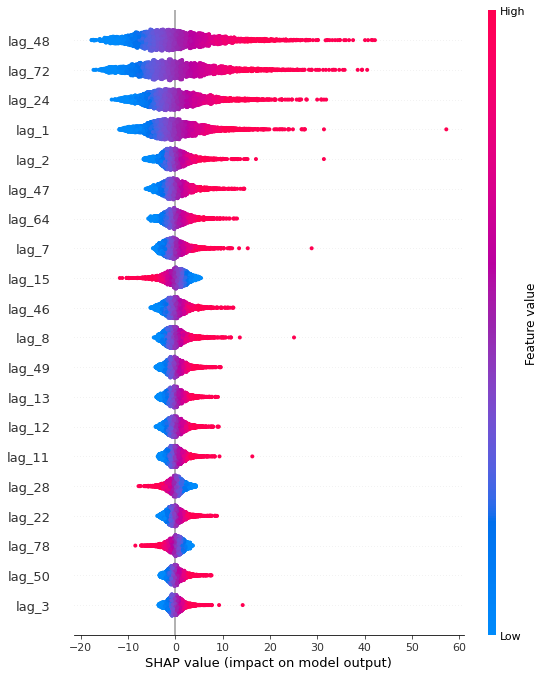

In [75]:
shap.summary_plot(shap_values, X_train, feature_names=features_train.columns)

#### net_2 dropout

In [76]:
tscv = TimeSeriesSplit(n_splits=5)

In [77]:
# Преобразование в тензоры PyTorch
X_train = torch.FloatTensor(features_train.values)
X_test = torch.FloatTensor(features_test.values)
y_train = torch.FloatTensor(target_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(target_test.values).reshape(-1, 1)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([3894, 84]),
 torch.Size([442, 84]),
 torch.Size([3894, 1]),
 torch.Size([442, 1]))

In [88]:
# PyTorch classifier
class NetRegressor(nn.Module):
    def __init__(self, activation1=nn.ReLU, n_neurons1=10, dropout_rate1=0,
                 activation2=nn.ReLU, n_neurons2=10, dropout_rate2=0):
        super().__init__()
        self.layer1 = nn.Linear(X_train.size()[1], n_neurons1)
        self.act1 = activation1()
        self.dropout1 = nn.Dropout(dropout_rate1)
        self.layer2 = nn.Linear(n_neurons1, n_neurons2)
        self.act2 = activation2()
        self.dropout2 = nn.Dropout(dropout_rate2)
        self.output = nn.Linear(n_neurons2, 1)
        self.prob = nn.ReLU()
 
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout1(x)
        x = self.act2(self.layer2(x))
        x = self.dropout2(x)
        x = self.prob(self.output(x))
        return x

In [89]:
# create model with skorch
model_net = NeuralNetRegressor(
    NetRegressor,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam,
    verbose=False
)

In [93]:
param_grid = {
    'max_epochs': [10, 15],
    'module__activation1': [nn.ReLU, nn.ELU],
    'module__activation2': [nn.ReLU, nn.ELU],
    'optimizer__lr': [3e-1, 2e-2, 1e-3],
    'module__n_neurons1': [30, 50],
    'module__n_neurons2': [30, 50],
    'module__dropout_rate1': [0, 0.2, 0.4],
    'module__dropout_rate2': [0, 0.2]
}

grid = GridSearchCV(estimator=model_net, param_grid=param_grid, n_jobs=-1, cv=tscv, scoring='neg_root_mean_squared_error')

In [94]:
%%time
start_time = time.time()  # время начала выполнения

grid_result = grid.fit(X_train, y_train)

end_time = time.time()  # время окончания выполнения
execution_time_net = end_time - start_time  # вычисляем время выполнения
print(f"Время выполнения программы: {execution_time_net} секунд")

Время выполнения программы: 5450.860181570053 секунд
CPU times: user 1h 29min 26s, sys: 37.4 s, total: 1h 30min 3s
Wall time: 1h 30min 50s


In [95]:
grid_result.best_estimator_

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=NetRegressor(
    (layer1): Linear(in_features=84, out_features=30, bias=True)
    (act1): ELU(alpha=1.0)
    (dropout1): Dropout(p=0, inplace=False)
    (layer2): Linear(in_features=30, out_features=30, bias=True)
    (act2): ReLU()
    (dropout2): Dropout(p=0, inplace=False)
    (output): Linear(in_features=30, out_features=1, bias=True)
    (prob): ReLU()
  ),
)

In [96]:
grid_result.best_params_

{'max_epochs': 15,
 'module__activation1': torch.nn.modules.activation.ELU,
 'module__activation2': torch.nn.modules.activation.ReLU,
 'module__dropout_rate1': 0,
 'module__dropout_rate2': 0,
 'module__n_neurons1': 30,
 'module__n_neurons2': 30,
 'optimizer__lr': 0.02}

In [97]:
net_best_score = -grid_result.best_score_
net_best_score

23.995480728149413

In [98]:
predictions_net =  grid_result.best_estimator_.predict(X_test)

In [99]:
rmse_net = mean_squared_error(y_test, predictions_net, squared=False)
rmse_net

40.177776

<br/>
<div class="alert alert-info">
Не могу понять, почему не работает shap_values с нейросетью. Пробовала разные эксплейнеры: Explainer, DeepExplainer. Но каждый раз проблемы с маской не могу понять в чём дело.
</div>

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>

shap_values требует некоторого количества времени для вычислений. Можно попробовать следующие шаги для решения проблемы:


- Использовать другой метод объяснения модели, например, LIME (Local Interpretable Model-Agnostic Explanations).
- Если используется DeepExplainer, нужно убедиться, что ему передается тензор, а не массив.
Если ничего из этого не помогает, можно попробовать увеличить время вычисления shap_values или использовать другой подход к объяснению модели.


<div class="alert alert-info">
Разобралась
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [100]:
explainer = shap.DeepExplainer(grid_result.best_estimator_.module_, X_train)

In [101]:
%%time
shap_values = explainer.shap_values(X_train)

CPU times: user 8min 49s, sys: 7.98 s, total: 8min 57s
Wall time: 8min 59s


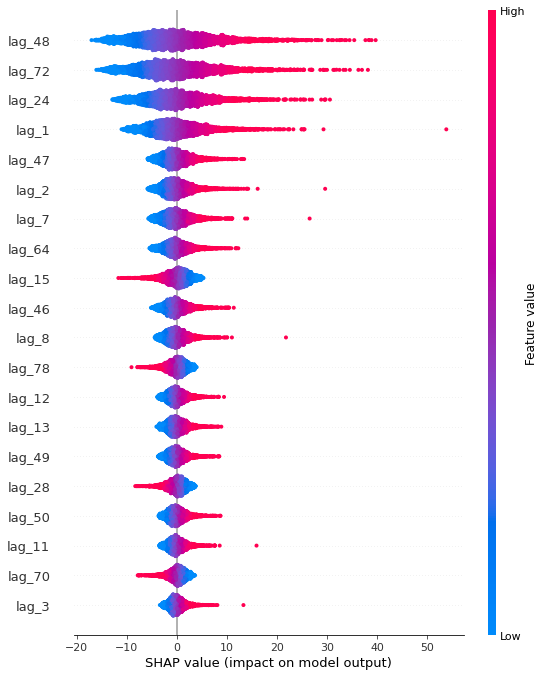

In [102]:
shap.summary_plot(shap_values, X_train, feature_names=features_train.columns)

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Молодец, что пробуешь разные модели в этом шаге)
</div>

## Тестирование

In [105]:
final_report = pd.DataFrame({'model_name': ['LinearRegression', 'Random Forest', 'Catboost', 'Neural_net'],
                            'rmse_val_score': [LR_best_score, RF_best_score, cat_best_score, net_best_score],
                            'execution_time': [execution_time_LR, execution_time_RF, execution_time_cat, execution_time_net]
                            #'test_rmse': [rmse_LR, rmse_forest, rmse_cat, rmse_net]
                            })

In [106]:
display(final_report)

,model_name,rmse_val_score,execution_time
0,LinearRegression,24.251716,5.266768
1,Random Forest,25.512260,60.814213
2,Catboost,23.288620,3979.713909
3,Neural_net,23.995481,5450.860182


**Вывод**

Мы обучили модель линейной регрессии, случайного леса, catboost и нейросеть. По результатам тестирования лучший результат показал catboost, на втором месте нейросеть и модель линейной регрессии. Стоит отметить, что обучение линейной регрессии заняло гароздо меньше времени чем обучение нейросети (почти в 100 раз быстрее) и catboost (в 700 раз быстрее). Поэтому в данной задаче целесообразно использовать модель линейной регрессии.

In [107]:
predictions_LR = gs_LR.best_estimator_.predict(features_test)
rmse_LR = mean_squared_error(target_test, predictions_LR, squared=False)
rmse_LR

41.78402177098253

In [110]:
preds = pd.DataFrame(predictions_LR, index=target_test.index)
preds.head()

,0
datetime,
2018-08-13 14:00:00,122.649414
2018-08-13 15:00:00,139.897461
2018-08-13 16:00:00,153.990234
2018-08-13 17:00:00,113.833008
2018-08-13 18:00:00,99.737305


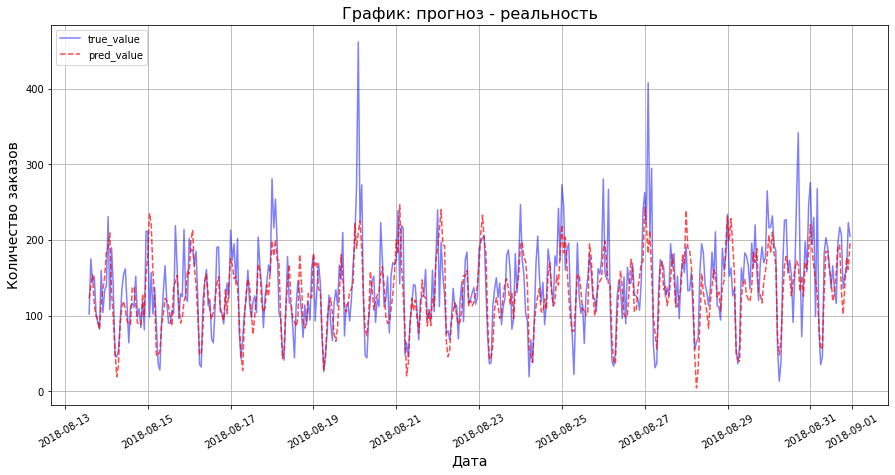

In [111]:
fig= plt.subplots(figsize=(15, 7))

plt.plot(target_test, '-', c='blue', alpha=0.5, label="true_value")
plt.plot(preds, '--', c='red', alpha=0.7, label="pred_value")
plt.title('График: прогноз - реальность', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.grid()
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    
В конце проекта желательно визуализировать результаты (построить 2 временных ряда на одном графике), показать предсказанные значения лучшей модели и реальные тестовые
        


<div class="alert alert-info">
Поправила
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### **Общий вывод**

Мы загрузили данные о количестве заказов такси с марта по август 2018 года. Данные распределены нормально. Мы ресеплировали данные выбрав новую длину интервала в 1 час, количество заказов соответсвенно суммировали. Можно заметить тренд по увеличению количества заказов летом.

Мы написали функцию для создания признаков. Добавили такие признаки как месяц, день и день недели. Для прогнозирования роста или уменьшения заказов добавили "отстающие значения". Определили скользящее среднее, чтобы выявить общий тренд временного ряда.

Мы обучили модель линейной регрессии, случайного леса, catboost и нейросеть. По результатам тестирования лучший результат показал catboost, на втором месте нейросеть и модель линейной регрессии. Стоит отметить, что обучение линейной регрессии заняло гароздо меньше времени чем обучение нейросети (почти в 100 раз быстрее) и catboost (в 700 раз быстрее). Поэтому в данной задаче целесообразно использовать модель линейной регрессии.

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с этим проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались  функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера 2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально. Принимаю работу)
    
Если хочешь лучше разобраться в теме, то могу посоветовать тебе: 
    
Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k    
    
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A
    
Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing
    
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg
https://facebook.github.io/prophet/
    
https://facebook.github.io/prophet/docs/quick_start.html#python-api
    
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb  
    
    
    
В этом проекте были отработаны все моменты. 
    
Успехов тебе в следующем спринте!
    
Рад был помочь тебе)
    
</div>